In [61]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from tensorflow.keras import regularizers
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,classification_report

In [62]:
df=pd.read_csv("Imputed.csv")

In [63]:
df

,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
0,47900.0,260.0,3108,4,3.0,260.0,6.0,260.0,260.0
1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0
2,100000.0,260.0,3502,1,0.0,260.0,1.0,260.0,260.0
3,45000.0,260.0,3526,2,2.0,260.0,5.0,260.0,260.0
4,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...
246497,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0
246498,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0
246499,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0
246500,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0


In [64]:
X=df.drop("HINCP_x",axis=1)
y=df["HINCP_x"]

In [65]:
y=np.reshape(y.values,(-1,1))

In [66]:
ss=StandardScaler()
ssy=StandardScaler()
min_max=MinMaxScaler()
min_maxy=MinMaxScaler()



In [67]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8)

In [68]:
X_train_ss=ss.fit_transform(X_train)
y_train_ss=ssy.fit_transform(y_train)


In [111]:
X_train_mm=min_max.fit_transform(X_train)
y_train_mm=min_maxy.fit_transform(y_train)


In [90]:
model=Sequential()
model.add(Dense(50 ,activation="relu",input_dim=8))
# model.add(Dense(25 ,activation="relu"))
# model.add(Dense(25 ,activation="relu"))
model.add(Dense(25 ,activation="relu"))
model.add(Dense(1, ))#activation='linear'))
model.compile(loss='mse',optimizer="adam",metrics=[tf.keras.metrics.RootMeanSquaredError(),"mae"])
# add Dropouts layers when overfitting
#SS helps with outliers

# ,input_shape=(8,)

In [71]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 50)                450       
_________________________________________________________________
dense_20 (Dense)             (None, 25)                1275      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 26        
Total params: 1,751
Trainable params: 1,751
Non-trainable params: 0
_________________________________________________________________


In [112]:
history=model.fit(X_train_mm,y_train_mm,epochs=1,batch_size=50,validation_split=.2)#callbacks=callbacks_list)

Train on 157760 samples, validate on 39441 samples
Epoch 1/1
157760/157760 [==============================] - 3s 20us/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - mae: 0.0253 - val_loss: 0.0019 - val_root_mean_squared_error: 0.0434 - val_mae: 0.0246


In [45]:
min_maxy.inverse_transform([[.5829]])

array([[963525.38]])

In [47]:
min_maxy.inverse_transform([[.0263]])

array([[32778.86]])

In [60]:
(0.0019)**.5

0.04358898943540673

In [33]:
ssy.inverse_transform([.6009])

array([142854.86490422])

dict_keys(['val_loss', 'val_root_mean_squared_error', 'val_mae', 'loss', 'root_mean_squared_error', 'mae'])


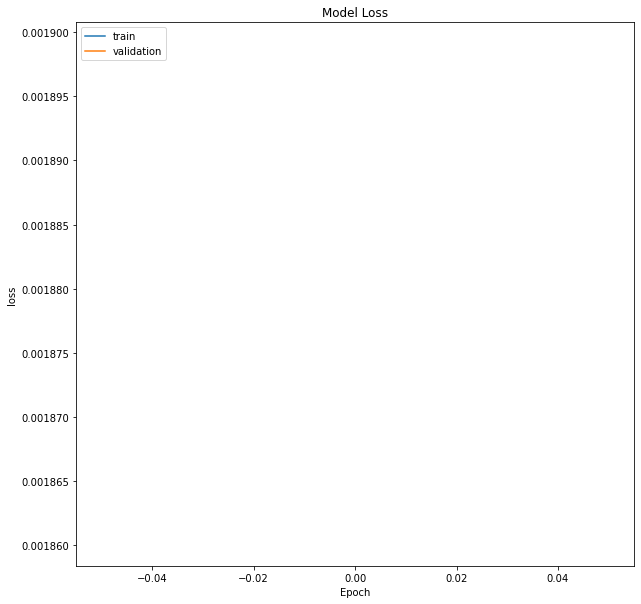

In [102]:
print(history.history.keys())
#'Loss'
fig, ax = plt.subplots(figsize=((10,10)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


In [113]:
# y_test_ss=ss.transform(y_test)
# X_test_ss=ss.transform(X_test)
y_test_mm=min_max.transform(y_test)
X_test_mm=min_max.transform(X_test)

ValueError: non-broadcastable output operand with shape (49301,1) doesn't match the broadcast shape (49301,8)

In [114]:
y_hat=model.predict(X_test_mm)
# y_hat=model.predict()

In [115]:
# y_test_mm=min_max.inverse_transform(y)
#invert normalize
X_test_mm=min_max.inverse_transform(X_test_mm)
yhat=min_max.inverse_transform(y_hat)
# X_test_ss=ss.inverse_transform(X_test_ss)
print("X=%s, Predictied=%s" % (df.values[0],y_hat[0]))

ValueError: non-broadcastable output operand with shape (49301,1) doesn't match the broadcast shape (49301,8)

In [116]:
# early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1,
#                            mode='auto')
# callbacks_list = [early_stop]
# history_es = model_es.fit(X_train_s, np.array(y_train),
#                           validation_data=(X_test_s, np.array(y_test)),
#                          epochs=40, batch_size=None, callbacks=callbacks_list)